In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st 


In [4]:
# Name of the CSV file
file = 'Ressources/merge_tobacco_dataset.csv'
tobacco_df = pd.read_csv(file)
tobacco_df

,State,tobacco_consumption,coffee_consumption,Depression_Percentage
0,Arizona,23.982905,1.30,17.740000
1,Arkansas,26.790602,2.12,23.437037
2,Delaware,24.225540,2.44,17.084000
3,Georgia,24.896078,1.54,16.865000
4,Hawaii,23.765605,1.52,11.795455
5,Kansas,25.739286,2.07,18.993750
6,Louisiana,26.641782,2.03,20.457143
7,Maine,26.461653,2.05,23.591667
8,Maryland,23.405366,1.57,15.963158
9,Massachusetts,23.906030,1.51,19.095833


The correlation between tobacco consumption and depression percentage is 0.50


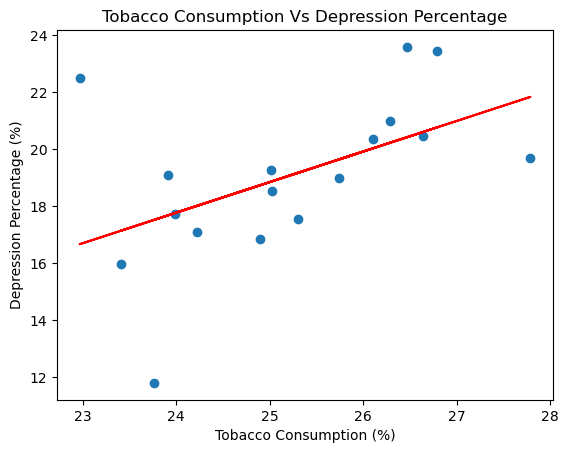

In [10]:
#find intercept and the slope to calculate regression equation
plt.scatter(tobacco_df['tobacco_consumption'], tobacco_df['Depression_Percentage'])
correlation = st.pearsonr(tobacco_df["tobacco_consumption"], tobacco_df["Depression_Percentage"])
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(tobacco_df["tobacco_consumption"], tobacco_df["Depression_Percentage"])
regress_values = tobacco_df["tobacco_consumption"] * slope + intercept
print("The correlation between tobacco consumption and depression percentage is {0:0.2f}".format(correlation[0]))
plt.plot(tobacco_df["tobacco_consumption"],regress_values,"r-")
plt.xlabel("Tobacco Consumption (%)")
plt.ylabel("Depression Percentage (%)")
plt.title("Tobacco Consumption Vs Depression Percentage")
plt.show()


The correlation between tobacco consumption and cups of coffee is 0.50


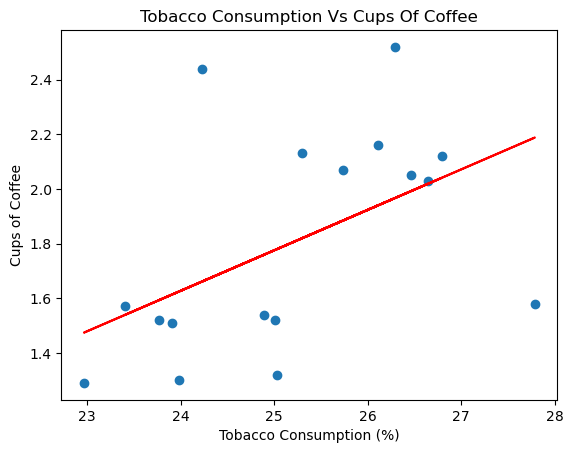

In [13]:
#find intercept and the slope to calculate regression equation
plt.scatter(tobacco_df['tobacco_consumption'], tobacco_df['coffee_consumption'])
correlation = st.pearsonr(tobacco_df["tobacco_consumption"], tobacco_df["coffee_consumption"])
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(tobacco_df["tobacco_consumption"], tobacco_df["coffee_consumption"])
regress_values = tobacco_df["tobacco_consumption"] * slope + intercept
print("The correlation between tobacco consumption and cups of coffee is {0:0.2f}".format(correlation[0]))
plt.plot(tobacco_df["tobacco_consumption"],regress_values,"r-")
plt.xlabel("Tobacco Consumption (%)")
plt.ylabel("Cups of Coffee")
plt.title("Tobacco Consumption Vs Cups Of Coffee")
plt.show()

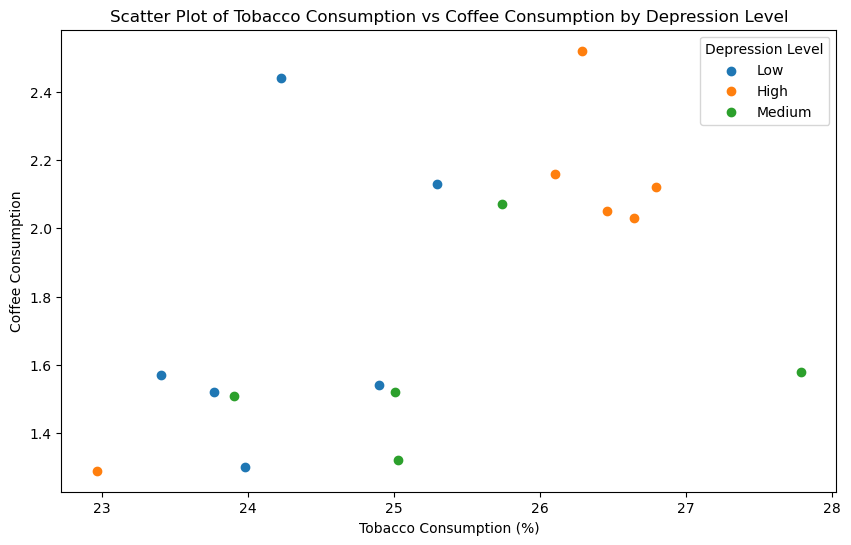

In [14]:
#Categorize the data using bins
low_threshold = tobacco_df['Depression_Percentage'].quantile(0.33)
high_threshold = tobacco_df['Depression_Percentage'].quantile(0.66)


tobacco_df['depression_category'] = pd.cut(tobacco_df['Depression_Percentage'],
                               bins=[tobacco_df['Depression_Percentage'].min()-1, low_threshold, high_threshold, tobacco_df['Depression_Percentage'].max()],
                               labels=['Low', 'Medium', 'High'])

plt.figure(figsize=(10, 6))
for category in tobacco_df['depression_category'].unique():
    subset = tobacco_df[tobacco_df['depression_category'] == category]
    plt.scatter(subset['tobacco_consumption'], subset['coffee_consumption'], label=category)

plt.xlabel('Tobacco Consumption (%)')
plt.ylabel('Coffee Consumption')
plt.title('Scatter Plot of Tobacco Consumption vs Coffee Consumption by Depression Level')

plt.legend(title='Depression Level')

plt.show()